In [ ]:
import pandas as pd
import numpy as np
import datetime
import re

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
#한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#한글 깨짐 방지 코드
from matplotlib import rc
rc('font', family='NanumGothicOTF')
plt.rcParams['axes.unicode_minus'] = False

__경로 설정__

In [ ]:
path='파일 경로'

__데이터 로드__

In [ ]:
news=pd.read_csv(path+'파일명')


# 각 후보별 언급 빈도수 그래프


In [ ]:
Fox=news[news.Press=='Fox']
RN=news[(news.Press=='Reuters')|(news.Press=='NPR')]
CP=news[(news.Press=='CBS')|(news.Press=='Politico')]

In [ ]:
Fox['MB']='Right'
RN['MB']='Center'
CP['MB']='Left'

In [ ]:
news=pd.concat([Fox,RN,CP],ignore_index=True)

In [ ]:
news['trump_count']=news.Text.str.findall(eng).apply(stopword).apply(FreqDist).apply(trump)
news['biden_count']=news.Text.str.findall(eng).apply(stopword).apply(FreqDist).apply(biden)

In [ ]:
count=news.groupby(['MB'])[['trump_count','biden_count']].sum()

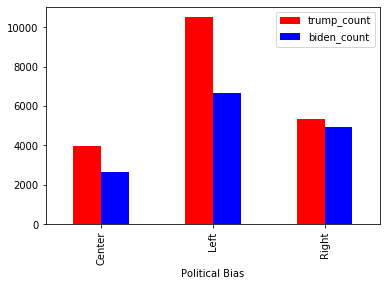

In [ ]:
g=count.plot(kind='bar',xlabel='Political Bias',color=('r','b'))


# 일별 후보자 언급 빈도수 


In [ ]:
date_count=news.groupby(['Date'])[['trump_count','biden_count']].sum()
date_count=date_count.T
date_count['name']=['Trump','Biden']

In [ ]:
a=list(range(1,31))
b=list((range(1,32)))
col=a+b
col[0]='9/1'
col[30]='10/1'
col.append('name')
date_count.columns=col

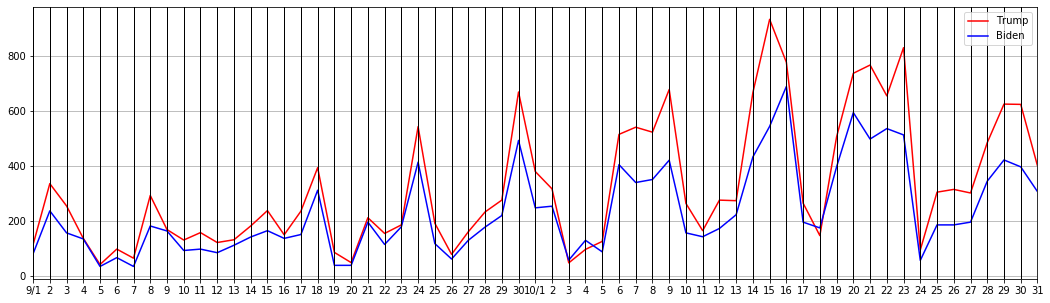

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(date_count,'name',color=('r','b'),ax=ax)
plt.savefig('frequency1.png',transparent=True)
plt.show()


# 이슈 기간 그래프


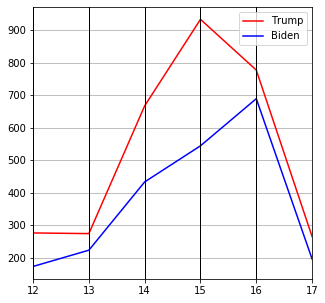

In [ ]:
date_count_issue=date_count[[12,13,14,15,16,17]].iloc[:,[1,3,5,7,9,11]]
date_count_issue['name']=['Trump','Biden']

fig,ax=plt.subplots(1,1,figsize=(5,5))
parallel_coordinates(date_count_issue,'name',color=('r','b'),ax=ax)
plt.savefig('frequency11.png',transparent=True)
plt.show()


# 기간별 후보자 언급 빈도수


In [ ]:
week_count=news.groupby(['Week'])[['trump_count','biden_count']].sum()
week_count=week_count.T

In [ ]:
c=list(range(1,10))
week_count.columns=list(map(lambda x:str(x)+' period',c))

In [ ]:
week_count['name']=['Trump','Biden']

In [ ]:
col=['1 period', '2 period', '3 period', '4 period', '5 period', '6 period',
       '7 period', '8 period','name']

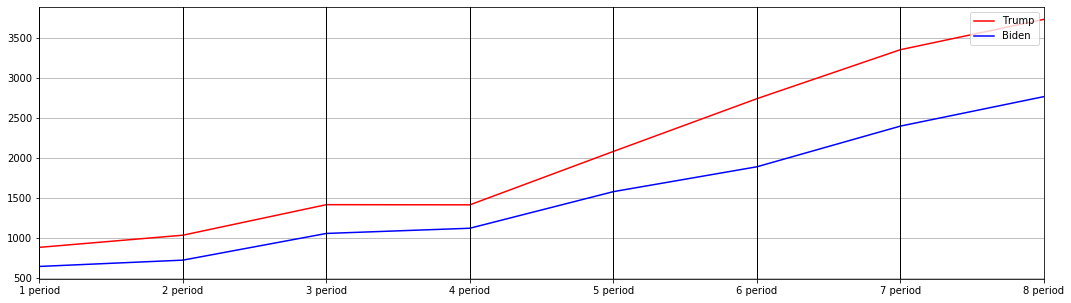

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(week_count[col],'name',color=('r','b'),ax=ax)

plt.savefig('whole_fre.png',transparent=True)
plt.show()


# 언론사별 후보자 언급 빈도수


In [ ]:
mb_count=news.groupby(['MB','Week'])[['trump_count','biden_count']].sum()
mb_count=mb_count.T

In [ ]:
center=mb_count['Center']
right=mb_count['Right']
left=mb_count['Left']

In [ ]:
c=list(range(1,10))
center.columns=list(map(lambda x:str(x)+' period',c))
right.columns=list(map(lambda x:str(x)+' period',c))
left.columns=list(map(lambda x:str(x)+' period',c))

In [ ]:
center['name']=['Trump','Biden']
right['name']=['Trump','Biden']
left['name']=['Trump','Biden']

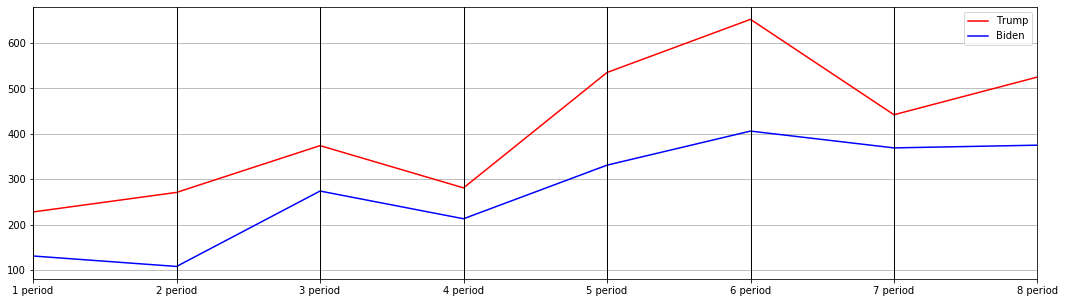

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(center[col],'name',color=('r','b'),ax=ax)
plt.savefig('center_fre.png',transparent=True)
plt.show()

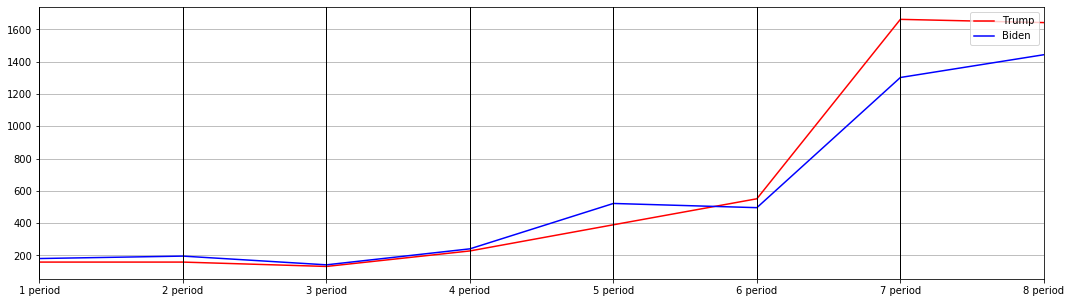

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(right[col],'name',color=('r','b'),ax=ax)
plt.savefig('right_fre.png',transparent=True)
plt.show()

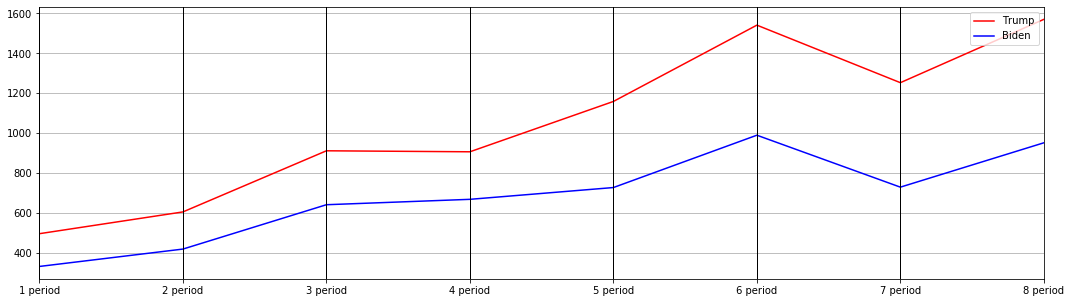

In [ ]:
from pandas.plotting import parallel_coordinates

fig,ax=plt.subplots(1,1,figsize=(18,5))
parallel_coordinates(left[col],'name',color=('r','b'),ax=ax)
plt.savefig('left_fre.png',transparent=True)
plt.show()


# 전체 키워드 top 10


In [ ]:
whole_keyword=tf.transform(news_week).toarray().sum(axis=0).argsort()[::-1]
result=[]
voca={j:i for i,j in tf.vocabulary_.items()}
for j in whole_keyword[:10]:
    result.append(voca[j])

whole=pd.DataFrame(result)

In [ ]:
whole['rank']=sorted(tf.transform(news_week).toarray().sum(axis=0))[::-1][:10]

In [ ]:
whole

,0,rank
0,state,1.447205
1,ballot,1.095828
2,campaign,1.075736
3,debate,1.049254
4,percent,1.028441
5,poll,1.008085
6,woman,0.983005
7,republican,0.918396
8,year,0.814315
9,court,0.799527


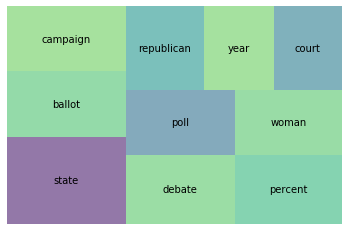

In [ ]:
import squarify

squarify.plot(sizes=whole['rank'], label=whole[0],alpha=.59)
plt.axis('off')
plt.savefig('ww.jpg')
plt.show();


# 언론사 편향에 따른 기간내의 단어 top10 비교 그래프


In [ ]:
#right 키워드 ['2020-10-12', '2020-10-13', '2020-10-14','2020-10-15', '2020-10-16']

result={'Keyword':[],'Right':[],'Left':[],'Center':[]}

voca={j:i for i,j in tf.vocabulary_.items()}
for j in left[:10]:
    result['Keyword'].append(voca[j])
    result['Right'].append(right_df[j])
    result['Left'].append(left_df[j])
    result['Center'].append(center_df[j])
    
pd.DataFrame(result)

,Keyword,Right,Left,Center
0,qanon,0.010612,0.779065,0.010612
1,state,0.613343,0.726049,0.613343
2,alberta,0.007985,0.649334,0.007985
3,county,0.214052,0.609735,0.214052
4,ballot,0.574025,0.583473,0.574025
5,colombia,0.000000,0.517503,0.000000
6,poll,0.302133,0.510972,0.302133
7,percent,0.053893,0.504034,0.053893
8,ufc,0.000000,0.503536,0.000000
9,recount,0.003822,0.462645,0.003822


In [ ]:
lis=[]
for i in range(0,10):
    j=0.08*i
    lis.append(j)
lis

[0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72]

In [ ]:
re['num']=lis

In [ ]:
fig = go.Figure(data=
    go.Parcoords(
        line_color='red',
        dimensions = list([
             dict(range = [0,0.8],
                 tickvals = lis,
                 label = 'Keyword', values = lis,
                 constraintrange = [0.07,0.08],
                 ticktext = re.Keyword.tolist()[::-1]),
            
            dict(range = [0,0.8],
                 label = re.columns[2], values = re['Left'].tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[1], values = re['Right'].tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[3], values = re['Center'].tolist()[::-1])
        ])
    )
)

fig.show()

<Figure size 432x288 with 0 Axes>


# 특정 단어 강조 그래프 


In [ ]:
fig = go.Figure(data=
    go.Parcoords(
        line_color='red',
        dimensions = list([
             dict(range = [0,0.8],
                 tickvals = lis,
                 label = 'Keyword', values = lis,
                 constraintrange = [0.7,0.8],
                 ticktext = re.Keyword.tolist()[::-1]),
            
            dict(range = [0,0.8],
                 label = re.columns[2], values = re['Left'].tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[1], values = re['Right'].tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[3], values = re['Center'].tolist()[::-1])
        ])
    )
)

fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = go.Figure(data=
    go.Parcoords(
         line = dict(color = re['num'],
                   colorscale = [[0,'gold'],[0.5,'lightseagreen'],[1,'purple']]),
        dimensions = list([
             dict(range = [0,0.8],
                 tickvals = lis,
                 label = 'Keyword', values = lis,
                 ticktext = re.Keyword.tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[2], values = re['Left'].tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[1], values = re['Right'].tolist()[::-1]),
            dict(range = [0,0.8],
                 label = re.columns[3], values = re['Center'].tolist()[::-1])
        ])
    )
)


fig.show()


# Top10 단어 그래프_트럼프 편향언론사


In [ ]:
re_right['num']=[10,9,8,7,6,5,4,3,2,1]
re_right['rank']=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

re_left['num']=[10,9,8,7,6,5,4,3,2,1]
re_left['rank']=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

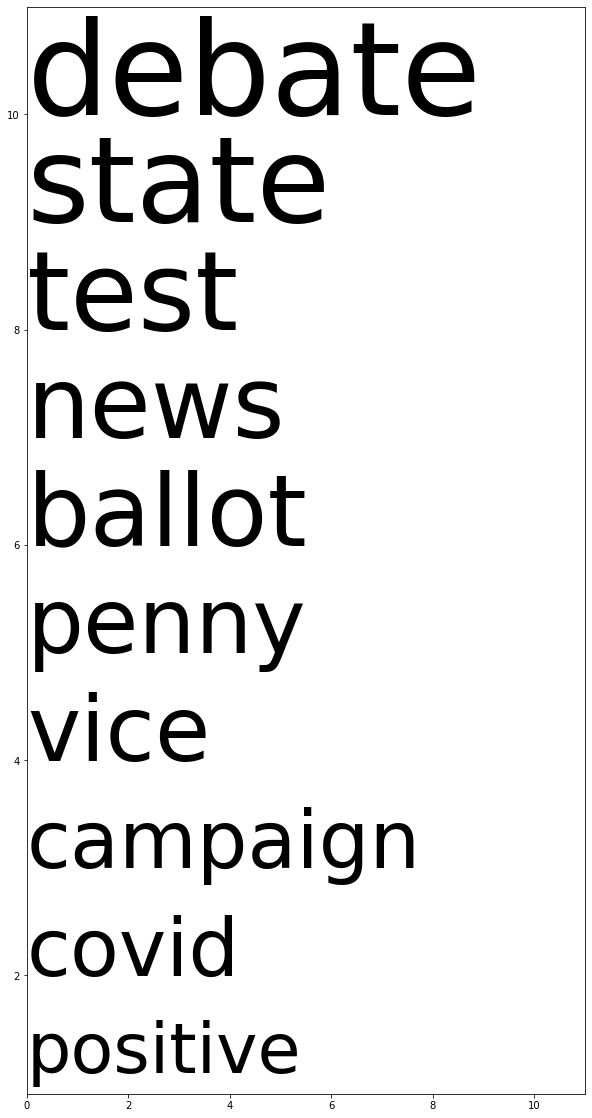

In [ ]:
fig = plt.figure(figsize=(10,20))
plt.axis([0, 11, 0.9, 11])
plt.text(0, 10, re_right[0][0], fontsize=130,)
plt.text(0, 9, re_right[0][1], fontsize=120,)
plt.text(0, 8, re_right[0][2], fontsize=110,)
plt.text(0, 7, re_right[0][3], fontsize=100,)
plt.text(0, 6, re_right[0][4], fontsize=100,)
plt.text(0, 5, re_right[0][5], fontsize=90,)
plt.text(0, 4, re_right[0][6], fontsize=90,)
plt.text(0, 3, re_right[0][7], fontsize=80,)
plt.text(0, 2, re_right[0][8], fontsize=80,)
plt.text(0, 1.1, re_right[0][9], fontsize=70,)

plt.savefig('right_word.jpg')
plt.show()



# Top10 단어 그래프_바이든 편향언론사


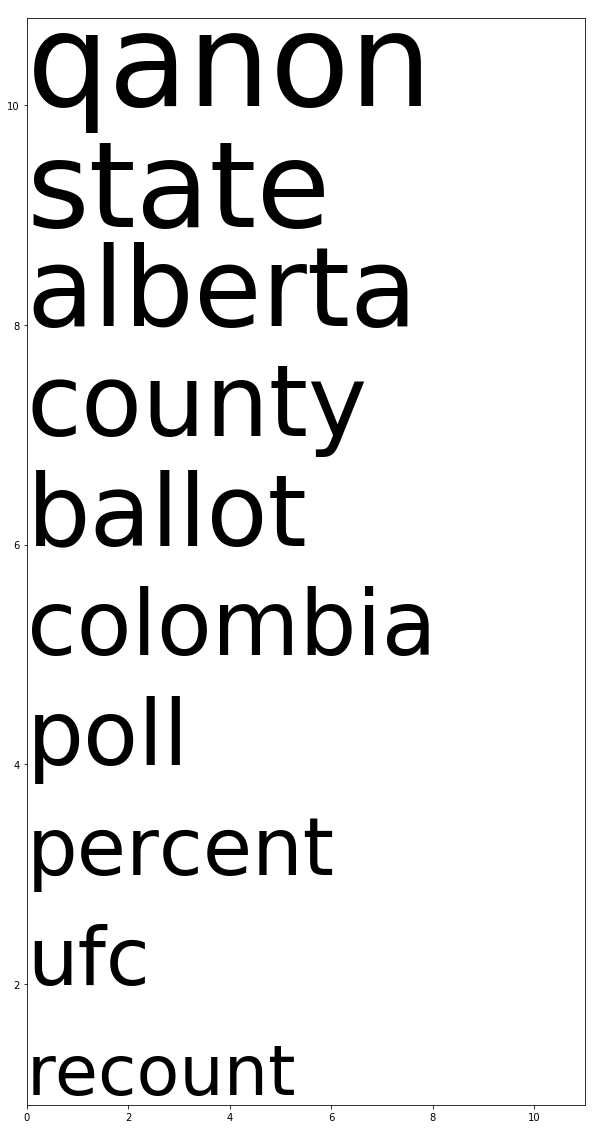

In [ ]:
fig = plt.figure(figsize=(10,20))
plt.axis([0, 11, 0.9, 10.8])
plt.text(0, 10, re_left[0][0], fontsize=130,)
plt.text(0, 8.9, re_left[0][1], fontsize=120,)
plt.text(0, 8, re_left[0][2], fontsize=110,)
plt.text(0, 7, re_left[0][3], fontsize=100,)
plt.text(0, 6, re_left[0][4], fontsize=100,)
plt.text(0, 5, re_left[0][5], fontsize=90,)
plt.text(0, 4, re_left[0][6], fontsize=90,)
plt.text(0, 3, re_left[0][7], fontsize=80,)
plt.text(0, 2, re_left[0][8], fontsize=80,)
plt.text(0, 1, re_left[0][9], fontsize=70,)

plt.savefig('left_word.jpg')
plt.show()


C:\Users\jw517\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



# 주별 기사량 추이

> 9월~10월 사이 각 언론사에서 나온 기사량 추이
> 10월 이후로 공화당을 지지하는 FOX의 기사량이 급증하는 것을 알 수 있음
> 성향별 그래프를 보았을 때 역시 보수언론의 정보제공량이 많음을 알 수 있다.

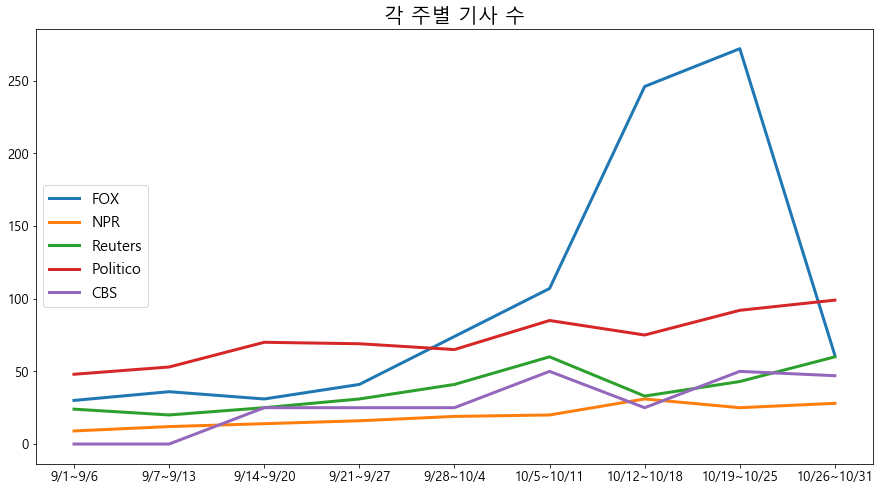

In [ ]:
# week chunk
date_rng = pd.date_range('2020-08-27', periods = 10, freq='W')
week = pd.cut(news.Date, bins=date_rng, right=False) 
# pd.DataFrame(df.groupby([week, "Press"]).count())


temp = pd.DataFrame(news.groupby([week, "Press"])["Title"].count())
arr = temp["Title"].values
CBS = arr[::5]
FOX = arr[1::5]
NPR = arr[2::5]
POLITICO = arr[3::5]
REUTERS = arr[4::5]


plt.figure(figsize=(15,8))
x_values = ["9/1~9/6", "9/7~9/13", "9/14~9/20", "9/21~9/27", "9/28~10/4", "10/5~10/11", "10/12~10/18","10/19~10/25", "10/26~10/31"]

plt.plot(x_values, FOX, linewidth =3)
plt.plot(x_values, NPR, linewidth =3)
plt.plot(x_values, REUTERS, linewidth =3)
plt.plot(x_values, POLITICO, linewidth =3)
plt.plot(x_values, CBS, linewidth =3)




plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('각 주별 기사 수', fontsize =20)
plt.legend(["FOX", "NPR", "Reuters", "Politico", "CBS"], prop={'size': 15}, loc= 6)
# plt.show()

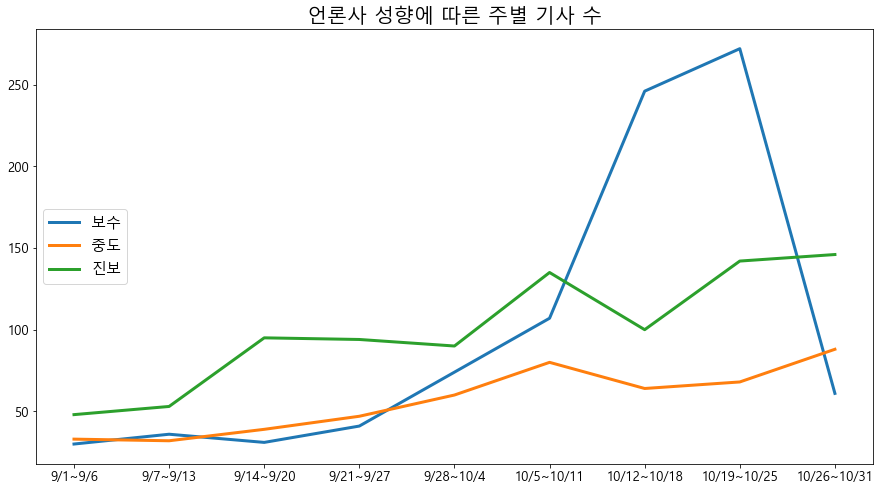

In [ ]:
plt.figure(figsize=(15,8))
x_values = ["9/1~9/6", "9/7~9/13", "9/14~9/20", "9/21~9/27", "9/28~10/4", "10/5~10/11", "10/12~10/18","10/19~10/25", "10/26~10/31"]

plt.plot(x_values, FOX, linewidth =3) # 보수
plt.plot(x_values, REUTERS+NPR, linewidth =3) # 중도
plt.plot(x_values, CBS+POLITICO, linewidth =3)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('언론사 성향에 따른 주별 기사 수', fontsize =20)
plt.legend(["보수","중도","진보"], prop={'size': 15}, loc= 6)
# plt.show()

# 트럼프 연관 단어 Wordcloud

In [ ]:
corpus=news['Text'].values.tolist()

corpus_token = []
for sentence in corpus:
    for word in word_tokenize(sentence):
            corpus_token.append(word) 

In [ ]:
count_list = Counter(corpus_token)
#TOP 20
common_cl = count_list.most_common(100)
common_cl[:10]

[('Trump', 19688),
 ('Biden', 8008),
 ('president', 6592),
 ('say', 6297),
 ('state', 3694),
 ('election', 3652),
 ('campaign', 3360),
 ('voter', 2679),
 ('poll', 2432),
 ('vote', 2321)]

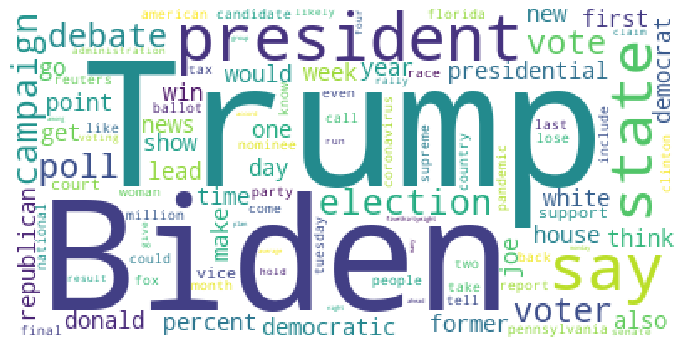

In [ ]:
wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='white'
                     ).generate_from_frequencies(dict(common_cl))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

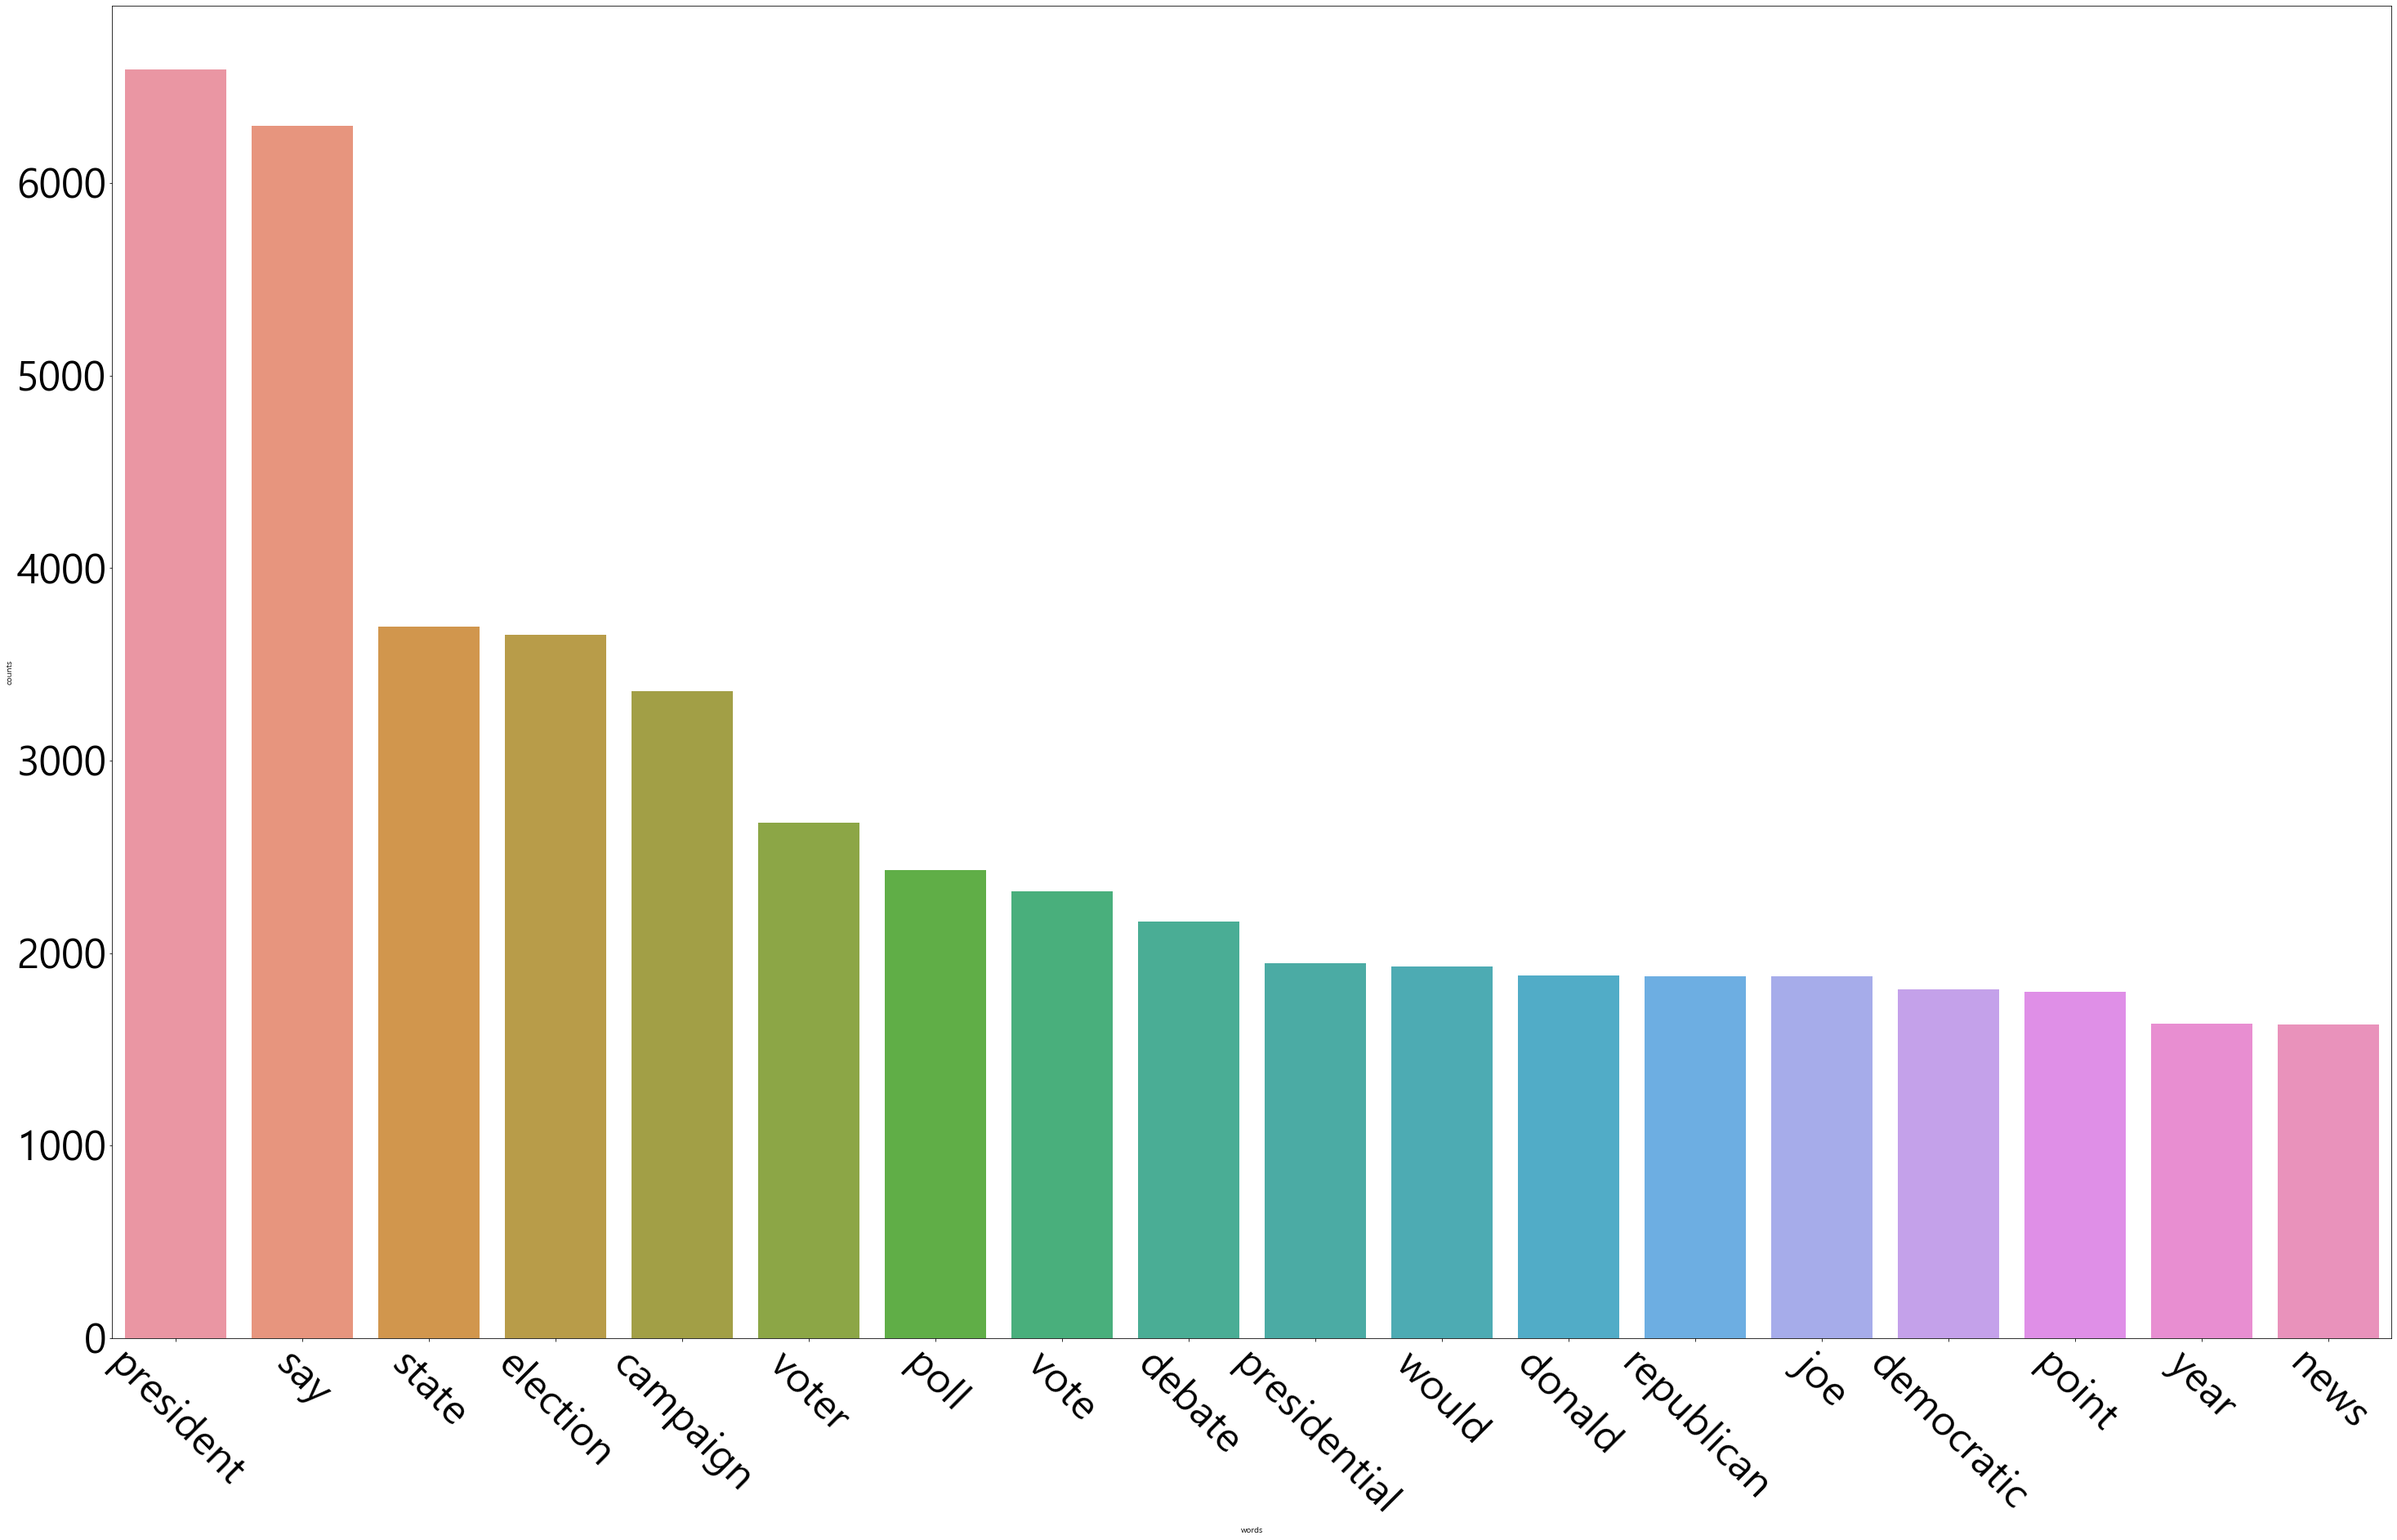

In [ ]:
temp = pd.DataFrame(common_cl, columns=["words","counts"])

plt.figure(figsize = (50,30))
sns.barplot(
    data= temp[2:20],
    x= "words",
    y= "counts"
)

plt.xticks(fontsize = 50, rotation = - 45)
plt.yticks(fontsize = 50)

# 바이든 연관 단어 Wordcloud

In [ ]:
corpus=news['Text'].values.tolist()

corpus_token = []
for sentence in corpus:
    for word in word_tokenize(sentence):
            corpus_token.append(word) 

['election',
 'year',
 'story',
 'scandals',
 'outrageous',
 'moment',
 'happen',
 'fast',
 'thanks',
 'social',
 'medium',
 'star',
 'react',
 'big',
 'quip',
 'out-there',
 'opinion',
 'real-time',
 'fox',
 'news',
 'round',
 'tweet',
 'celebrity',
 'recap',
 'big',
 'event',
 'presidential',
 'race',
 'president',
 'Trump',
 'joe',
 'Biden',
 'many',
 'race',
 'truly',
 'begin',
 'Biden',
 'make',
 'good',
 'promise',
 'nominate',
 'woman',
 'ticket',
 'knew',
 'would',
 'joebiden',
 'respect',
 'confront',
 'dignity',
 'leadership',
 'teamworkisdreamwork',
 'bidenharris',
 'actress',
 'sharon',
 'stone',
 'write',
 'comedian',
 'patton',
 'oswalt',
 'write',
 'take',
 'jab',
 'vice',
 'president',
 'mike',
 'penny',
 'celebrity',
 'react',
 'trump',
 'biden',
 'dual',
 'town',
 'hall',
 'veep',
 'star',
 'julia',
 'louis-dreyfus',
 'keep',
 'simple',
 'write',
 'kamalaharris',
 'joebiden',
 'thrill',
 'mark',
 'hamill',
 'kick',
 'thing',
 'compare',
 'Biden',
 'opponent',
 'dark',

In [ ]:
from collections import Counter
count_list = Counter(corpus_token)
#TOP 20
common_cl = count_list.most_common(100)
common_cl[:10]

[('Biden', 14046),
 ('Trump', 8800),
 ('say', 4810),
 ('president', 4499),
 ('joe', 3011),
 ('campaign', 2914),
 ('state', 2681),
 ('election', 2233),
 ('poll', 2186),
 ('voter', 1972)]

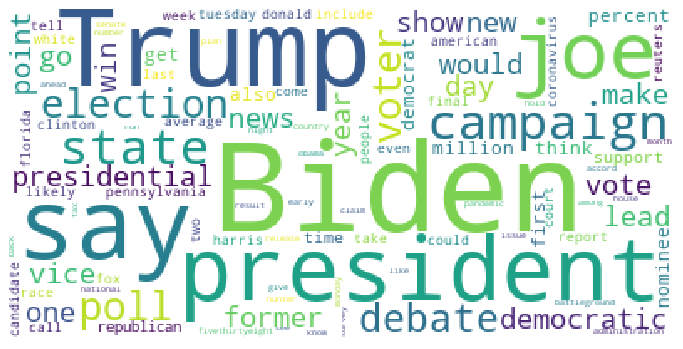

In [ ]:
wordcloud = WordCloud(relative_scaling = 0.2,
                     background_color='white'
                     ).generate_from_frequencies(dict(common_cl))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
temp = pd.DataFrame(common_cl, columns=["words","counts"])

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

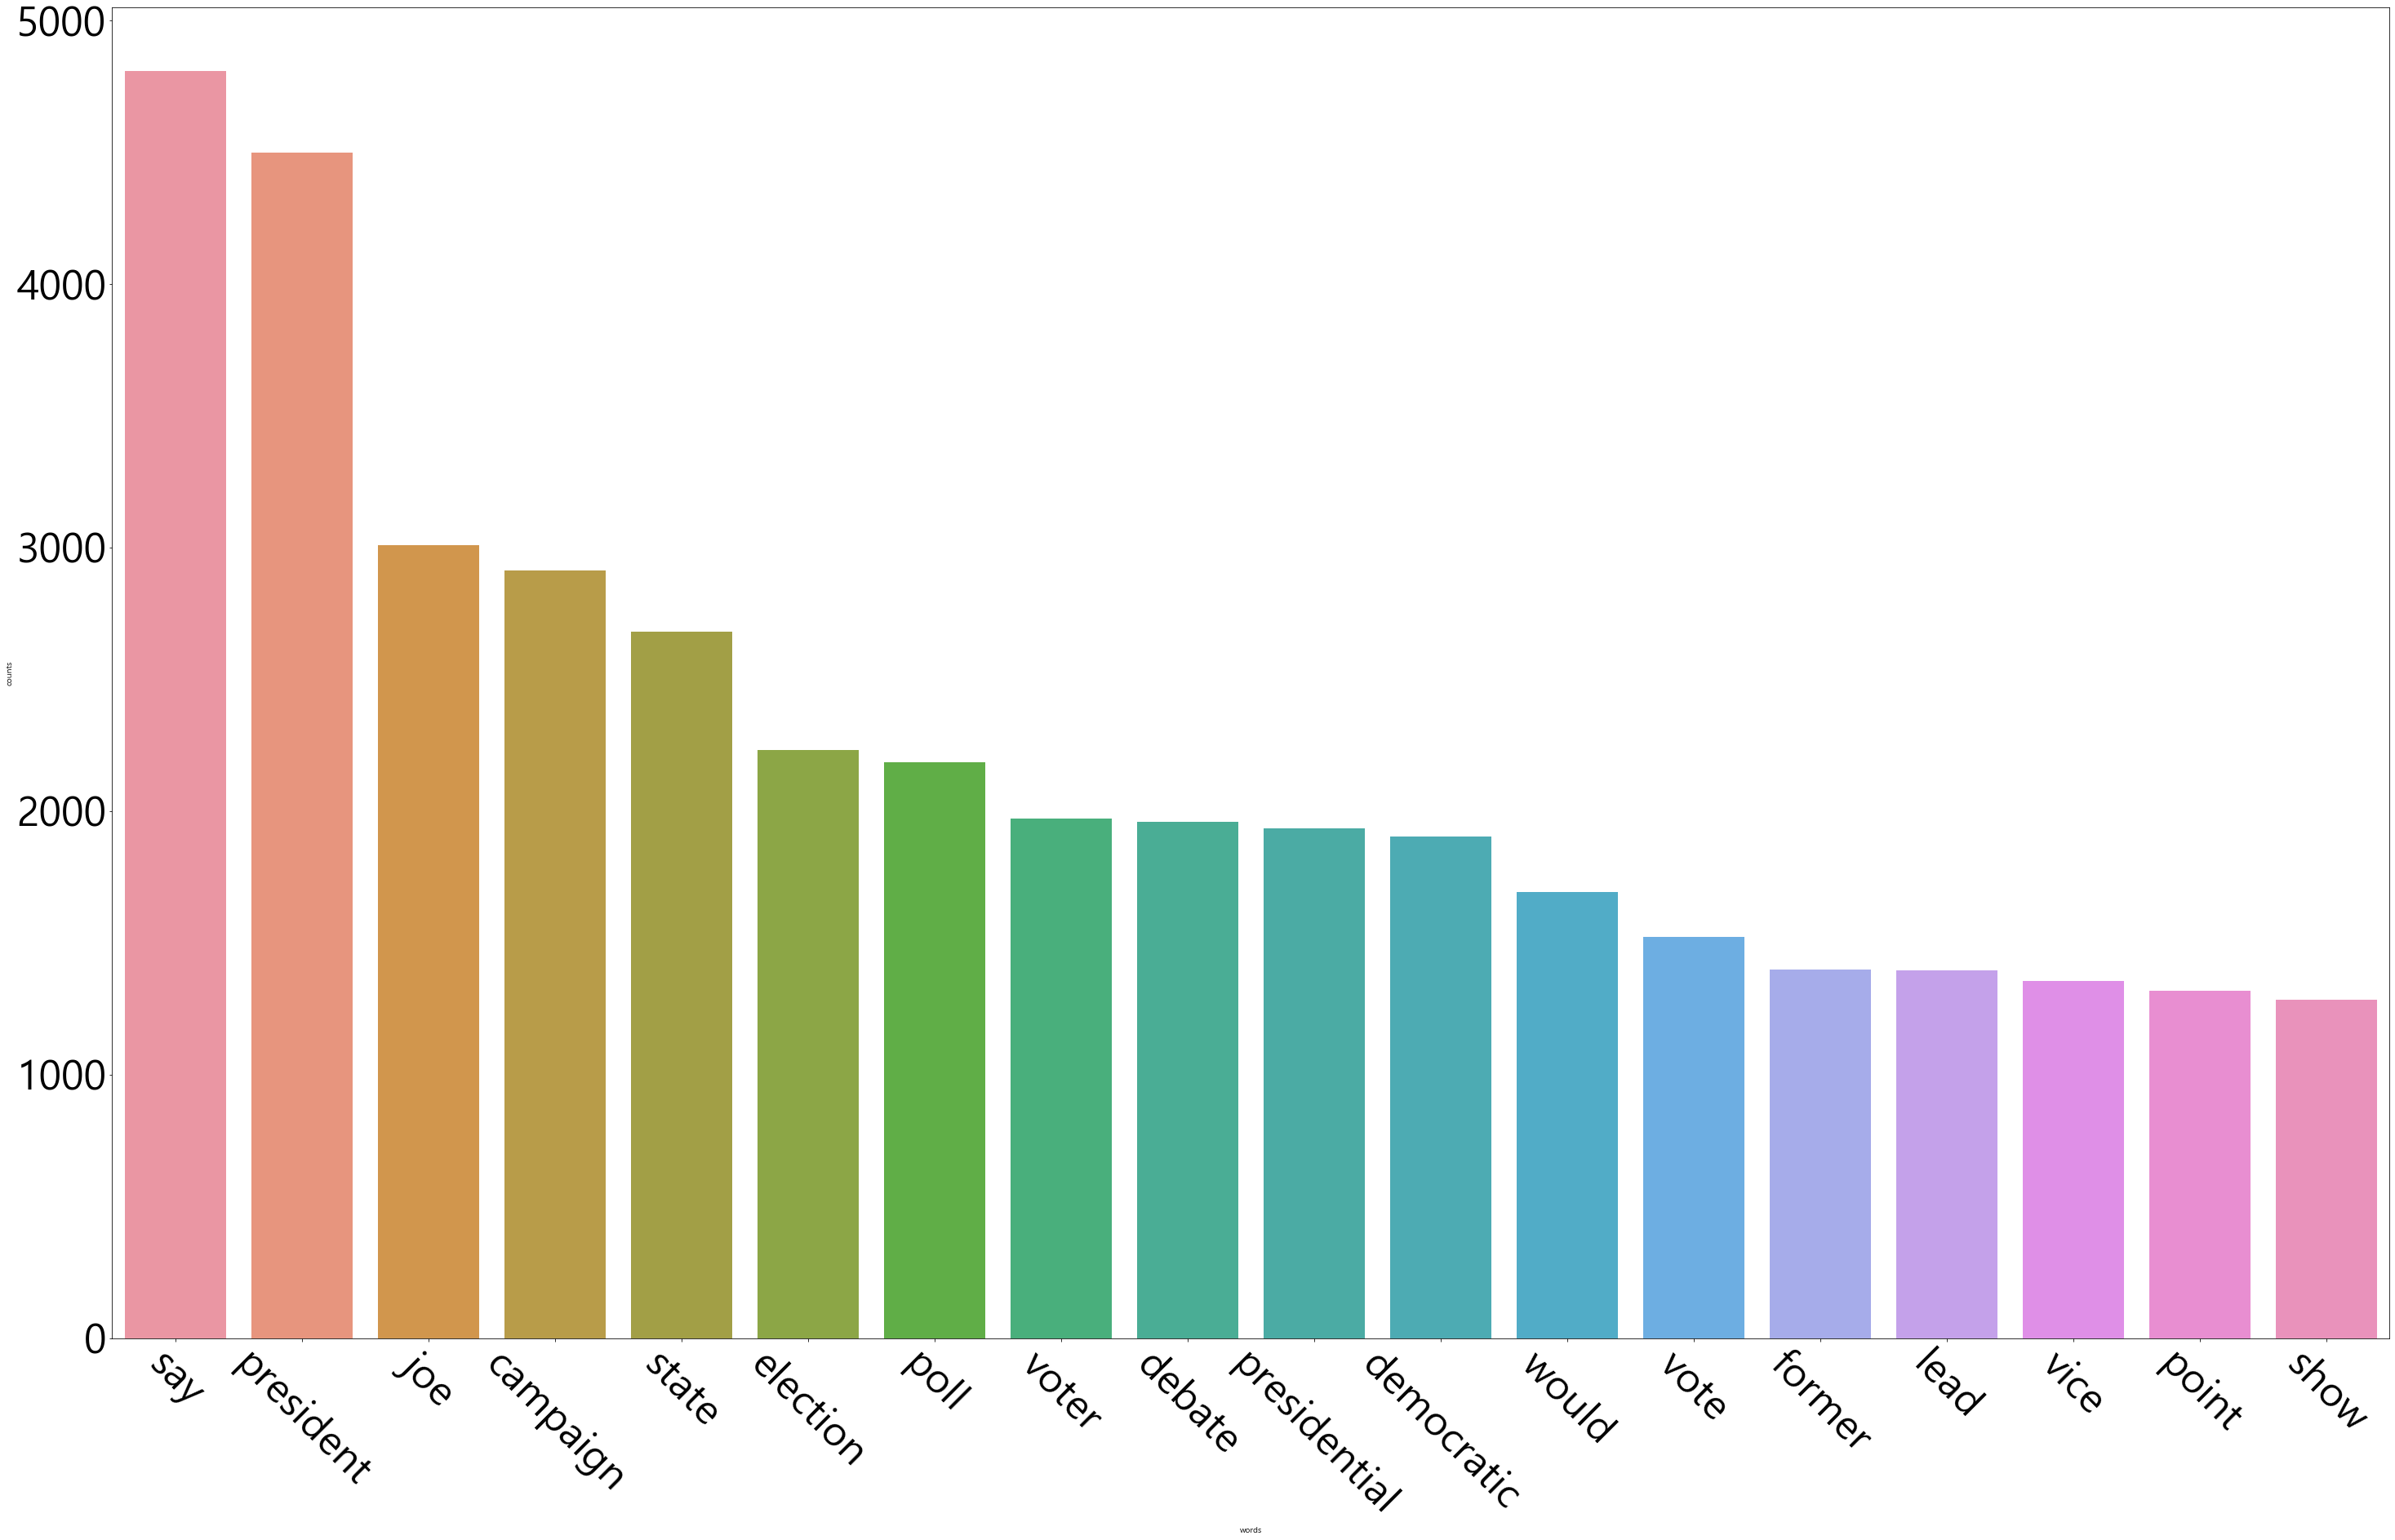

In [ ]:
plt.figure(figsize = (50,30))
sns.barplot(
    data= temp[2:20],
    x= "words",
    y= "counts"
)

plt.xticks(fontsize = 50, rotation = - 45)
plt.yticks(fontsize = 50)